In [16]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -nl dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidi

In [17]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2021-04-15 07:57:08--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2021-04-15 07:57:08--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?ODk93z3Y2FuO7xFPz3DZYgRwdDt_0O7Q8tVOXgC9riCvZuB4uS0Gi-g6Un5m2XjgDVBRnNmQtI39w2Qyef-TpcnQpDwC09F3AyxRKiKz2Jaijyx93

In [18]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [19]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-nhtdlowb
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-nhtdlowb
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp37-none-any.whl size=4307 sha256=c3021bc1da6e0bb4d4176def99dff9b182d7fc740c26dd3024011006cc678631
  Stored in directory: /tmp/pip-ephem-wheel-cache-_mi53lns/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin


In [20]:
%load_ext nvcc_plugin

The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin


In [21]:
%%cu

#include <stdio.h>

//Question1


void deviceQuery ()
{
  cudaDeviceProp prop;
  int nDevices=0, i;
  cudaError_t ierr;

  ierr = cudaGetDeviceCount(&nDevices);
  if (ierr != cudaSuccess) { printf("Sync error: %s\n", cudaGetErrorString(ierr)); }



  for( i = 0; i < nDevices; ++i )
  {
     ierr = cudaGetDeviceProperties(&prop, i);
     printf("Device number: %d\n", i);
   printf("i) GPU Name and Warp Size: \n");
     printf("  Device name: %s\n", prop.name);
      printf("  Warp size: %d\n\n", prop.warpSize);
   
    printf("ii) Computation Capabilities  and memory sizes: \n");
     printf("  Compute capability: %d.%d\n", prop.major, prop.minor); 
     printf("  Clock Rate: %d kHz\n", prop.clockRate);
     printf("  Total SMs: %d \n", prop.multiProcessorCount);
     printf("  Shared Memory Per SM: %lu bytes\n", prop.sharedMemPerMultiprocessor);
     printf("  Registers Per SM: %d 32-bit\n", prop.regsPerMultiprocessor);
     printf("  Max threads per SM: %d\n", prop.maxThreadsPerMultiProcessor);
     printf("  L2 Cache Size: %d bytes\n", prop.l2CacheSize);
     printf("  Total Global Memory: %lu bytes\n", prop.totalGlobalMem);
     printf("  Memory Clock Rate: %d kHz\n\n", prop.memoryClockRate);
     
   printf("iii) Max Block Dimensions and Grid Dimensions: \n");  
     printf("  Max threads per block: %d\n", prop.maxThreadsPerBlock);
     printf("  Max threads in X-dimension of block: %d\n", prop.maxThreadsDim[0]);
     printf("  Max threads in Y-dimension of block: %d\n", prop.maxThreadsDim[1]);
     printf("  Max threads in Z-dimension of block: %d\n\n", prop.maxThreadsDim[2]);

     printf("  Max blocks in X-dimension of grid: %d\n", prop.maxGridSize[0]);
     printf("  Max blocks in Y-dimension of grid: %d\n", prop.maxGridSize[1]);
     printf("  Max blocks in Z-dimension of grid: %d\n\n", prop.maxGridSize[2]);     
     
     printf("  Shared Memory Per Block: %lu bytes\n", prop.sharedMemPerBlock);
     printf("  Registers Per Block: %d 32-bit\n", prop.regsPerBlock);
     printf("  Warp size: %d\n\n", prop.warpSize);

  }
}

int main() {
    deviceQuery();
}

Device number: 0
i) GPU Name and Warp Size: 
  Device name: Tesla T4
  Warp size: 32

ii) Computation Capabilities  and memory sizes: 
  Compute capability: 7.5
  Clock Rate: 1590000 kHz
  Total SMs: 40 
  Shared Memory Per SM: 65536 bytes
  Registers Per SM: 65536 32-bit
  Max threads per SM: 1024
  L2 Cache Size: 4194304 bytes
  Total Global Memory: 15843721216 bytes
  Memory Clock Rate: 5001000 kHz

iii) Max Block Dimensions and Grid Dimensions: 
  Max threads per block: 1024
  Max threads in X-dimension of block: 1024
  Max threads in Y-dimension of block: 1024
  Max threads in Z-dimension of block: 64

  Max blocks in X-dimension of grid: 2147483647
  Max blocks in Y-dimension of grid: 65535
  Max blocks in Z-dimension of grid: 65535

  Shared Memory Per Block: 49152 bytes
  Registers Per Block: 65536 32-bit
  Warp size: 32




In [68]:
%%cu

//Question2

#include <stdint.h>
#include <stdlib.h>
#include <stdbool.h>
#include <iostream>
#include <cstring>
#include <time.h>
#include <stdio.h>
#include <string.h>

#include <cuda.h>


using namespace std;

#define NO_OF_CHARS 256
 
// A utility function to get maximum of two integers
 
// The preprocessing function for Boyer Moore's
// bad character heuristic
void Bad_Char_Heuristic( char *str, int size, 
                        int badchar[NO_OF_CHARS])
{
    int i;
    for (i = 0; i < NO_OF_CHARS; i++)
         badchar[i] = -1;
 
    for (i = 0; i < size; i++)
         badchar[(int) str[i]] = i;
}
 
// preprocessing for strong good suffix rule
void StrongSuffix_Preprocessing(int *shift, int *bpos,
                                char *pat, int m)
{
    // m is the length of pattern 
    int i=m, j=m+1;
    bpos[i]=j;
 
    while(i>0)
    {
        /*if character at position i-1 is not equivalent to
          character at j-1, then continue searching to right
          of the pattern for border */
        while(j<=m && pat[i-1] != pat[j-1])
        {
            /* the character preceding the occurence of t in 
               pattern P is different than mismatching character in P, 
               we stop skipping the occurences and shift the pattern
               from i to j */
            if (shift[j]==0)
                shift[j] = j-i;
 
            //Update the position of next border 
            j = bpos[j];
        }
        /* p[i-1] matched with p[j-1], border is found.
           store the  beginning position of border */
        i--;j--;
        bpos[i] = j; 
    }
}
 
//Preprocessing for case 2
void preprocess_case2(int *shift, int *bpos,
                      char *pat, int m)
{
    int i, j;
    j = bpos[0];
    for(i=0; i<=m; i++)
    {
        /* set the border postion of first character of pattern
           to all indices in array shift having shift[i] = 0 */
        if(shift[i]==0)
            shift[i] = j;
 
        /* suffix become shorter than bpos[0], use the position of 
           next widest border as value of j */
        if (i==j)
            j = bpos[j];
    }
}



__device__ 
int d_retval;

__global__ 
void BoyerMoore (char *string, int pattern_length, char *pat, int string_length, int *d1, int *d2, int n) {
    
    int i;
    d_retval = -1;
    // printf("%d\n", d_retval);
    
    int tid = blockIdx.x*blockDim.x+threadIdx.x;
    __syncthreads();
    if (tid<n)
      {

        int beg = tid*pattern_length;
        int end = min (beg+(2*pattern_length), string_length);

        // printf("%d %d %d \n",tid,beg,end);
        i = beg;
        while (i < end) {

          int j = pattern_length-1;
          while (j >= 0 && (string[i+j] == pat[j])) {
             // printf("here in loop\n");
              --j;
          }

          if(threadIdx.x==0&&blockIdx.x==0)
            printf("%d %d %d %d \n",j+1,i+j,d1[j+1],j - d2[string[i+j]]);

          if (j < 0) {
              d_retval = i+1;
             // printf("%d\n", d_retval);
             
              
               printf("\nPattern Found at position: %d\n",i+1);
              
              break;
          }
          else
            i += max(d1[j+1] , j - d2[string[i+j]]);
         
        }
      }
}


char h_string[500000] = "Today, there were many people who wished me well.";
char h_pattern[100] = "well";

int main() {
    char *d_s, *d_p;
    int *d_d1, *d_d2;
    
    

   /* printf("Enter string\n");
    scanf("%s", &h_string );

    printf("Enter pattern\n");
    scanf("%s", &h_pattern); */

   

    

    int string_length = strlen(h_string);
    int pattern_length = strlen(h_pattern);
    
    int *d1 = (int*)malloc(sizeof(int)*(pattern_length+1));
     
    for(int i=0;i<pattern_length+1;i++) d1[i]=0;
    int *bpos = (int*)malloc(sizeof(int)*(pattern_length+1));

    int d2[NO_OF_CHARS];
    
   
    
    StrongSuffix_Preprocessing(d1, bpos, h_pattern, pattern_length);
    preprocess_case2(d1, bpos, h_pattern, pattern_length);
 	  Bad_Char_Heuristic(h_pattern, pattern_length, d2);

   /* for(int i=0;i<pattern_length+1;i++)
      printf("%d ",d1[i]);
    printf("\n");
    for(int i=0;i<NO_OF_CHARS;i++)
      printf("%d ",d2[i]);
    printf("\n"); */

     
    
    cudaMalloc(&d_s, string_length*sizeof(char));
    cudaMemcpy(d_s, h_string,string_length*sizeof(char),cudaMemcpyHostToDevice);
   
    cudaMalloc(&d_p, pattern_length*sizeof(char));
    cudaMemcpy(d_p, h_pattern,pattern_length*sizeof(char),cudaMemcpyHostToDevice);

    cudaMalloc(&d_d2, NO_OF_CHARS*sizeof(int));
    cudaMemcpy(d_d2, d2,NO_OF_CHARS*sizeof(int),cudaMemcpyHostToDevice);

    cudaMalloc(&d_d1, (pattern_length+1)*sizeof(int));
    cudaMemcpy(d_d1, d1,(pattern_length+1)*sizeof(int),cudaMemcpyHostToDevice);

    
    int n = string_length/pattern_length;
    
    int BlockSize = 1024;
    int n_blocks = n/BlockSize + (n%BlockSize==0?0:1);
    BoyerMoore<<<n_blocks,BlockSize>>>(d_s, pattern_length, d_p, string_length, d_d1, d_d2, n);
    cudaDeviceSynchronize();

   

   
    
    return 0;
}

4 3 2 4 

Pattern Found at position: 45
4 7 2 4 

Pattern Found at position: 45



Text(0, 0.5, 'Average Network Latency')

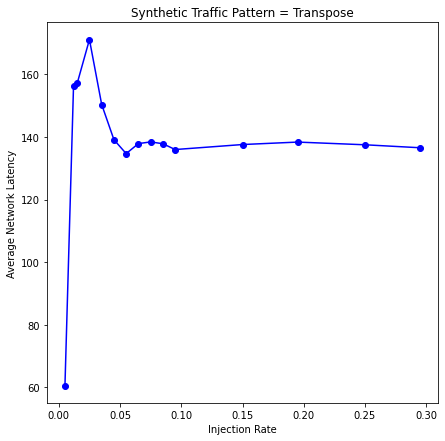

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

injection_rate = [0.005 , 0.012 ,0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,  0.095 ,0.150, 0.195,0.250, 0.295]          
avg_network_lateny = [60.557,156.290 , 157.163, 171.145, 150.379, 139.138, 134.688, 137.893, 138.427, 137.846, 135.991,137.590, 138.376,137.512, 136.563 ]
synthetic_traffic_pattern = "Transpose"

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(injection_rate, avg_network_lateny, 'bo-')
# plt.vlines(k, 0, binomial_dist_1, colors='m')


plt.title("Synthetic Traffic Pattern = Transpose")
plt.xlabel('Injection Rate')
plt.ylabel('Average Network Latency')




Text(0, 0.5, 'Average Network Latency')

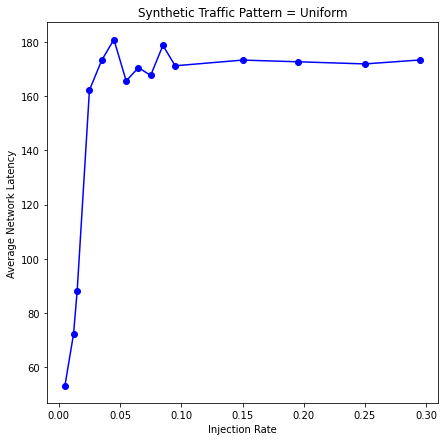

In [8]:
injection_rate = [0.005, 0.012, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,  0.095 ,0.150, 0.195,0.250, 0.295 ]       
avg_network_lateny = [53.048, 72.045, 88.162, 162.328, 173.359, 181.0225, 165.724, 170.653, 167.768, 178.867, 171.325,173.432, 172.813,172.018 ,173.475 ]
synthetic_traffic_pattern = "Uniform"

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(injection_rate, avg_network_lateny, 'bo-')
# plt.vlines(k, 0, binomial_dist_1, colors='m')


plt.title("Synthetic Traffic Pattern = Uniform")
plt.xlabel('Injection Rate')
plt.ylabel('Average Network Latency')